# Analysis of Dandiset 001341: Barrel cortex electrophysiology during tactile VR whisker-guided navigation

This notebook provides an AI-generated (with human supervision) exploration of Dandiset 001341, which contains electrophysiology data from the barrel cortex of mice during tactile VR whisker-guided navigation.

**Important Note:** This notebook was AI-generated with human supervision and has not been fully verified. Please be cautious when interpreting the code or results.

Instructions for setting up your environment and installing necessary packages:

1.  Make sure you have Python installed (preferably Python 3.7 or higher).
2.  Install the necessary packages using pip:

    ```bash
    pip install dandi pynwb lindi matplotlib seaborn jupytext
    ```

Now you are ready to run this notebook.

## Introduction

This Dandiset contains electrophysiology data recorded from the barrel cortex (specifically the C2 barrel column) of mice during a tactile virtual reality (VR) whisker-guided navigation task. Mice were head-fixed on a suspended ball, with two walls placed either side of the mouse. The lateral movement of these walls is coupled in a closed loop real time system to the trajectory of the mouse so that when the mouse moves to the left, the walls move in from the left. This causes them to orient themselves in the middle of the virtual corridor. Mice are presented with turns to the left (contralateral stimulation to recording site) and right (ipsilateral to recording site) in the virtual environment in a completely unrewarded form of a 2AFC task.

The data includes recordings of neuronal activity (units) and behavioral data related to the mouse's movement in the virtual environment.

Key metadata:

*   **Name:** Barrel cortex electrophysiology during tactile VR whisker-guided navigation
*   **Description:** Electrophysiology in the C2 barrel column of wS1 in mice during continuous tactile VR navigation using only the C2 whiskers.
*   **Number of Subjects:** 1
*   **Number of Files:** 1
*   **Keywords:** barrel cortex; S1; behavior; decision making; VR


In [1]:
# Use the DANDI API to list all of the assets in the Dandiset.
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001341")
assets = list(dandiset.get_assets())
assets

[RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x753e6817a720>, identifier='5738ae8a-dd82-425b-8966-bbcfd35649a7', path='sub-489/sub-489_ses-20220708.nwb', size=471593460, created=datetime.datetime(2025, 3, 7, 22, 5, 46, 847973, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 3, 7, 22, 5, 46, 847994, tzinfo=TzInfo(UTC)), blob='cf08efda-3a88-40c0-a143-cbe174557a34', dandiset_id='001341', version_id='draft'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x753e6817a720>, identifier='aca83a21-5a33-4101-891e-254e8d73e981', path='sub-503/sub-503_ses-20220902.nwb', size=549371972, created=datetime.datetime(2025, 3, 7, 22, 5, 57, 139891, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 3, 7, 22, 5, 57, 139912, tzinfo=TzInfo(UTC)), blob='471c70f3-dec1-4dad-b635-69a293fbaab8', dandiset_id='001341', version_id='draft')]

## Dataset Structure Exploration

The Dandiset contains NWB files, which are a standard format for storing neurophysiology data. We will explore one of the NWB files in this notebook.

In [2]:
# Select an NWB file from the Dandiset
nwb_file_path = "sub-489/sub-489_ses-20220708.nwb" # sub-489/sub-489_ses-20220708.nwb
nwb_file_asset_id = "5738ae8a-dd82-425b-8966-bbcfd35649a7"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_file_asset_id}/download/"

In [3]:
# Load the NWB file
import pynwb
import lindi

f = lindi.LindiH5pyFile.from_lindi_file(f"https://lindi.neurosift.org/dandi/dandisets/001341/assets/{nwb_file_asset_id}/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

## Accessing and Visualizing Sample Data

Let's access some sample data from the NWB file and visualize it. This will give us a better understanding of the dataset's contents.

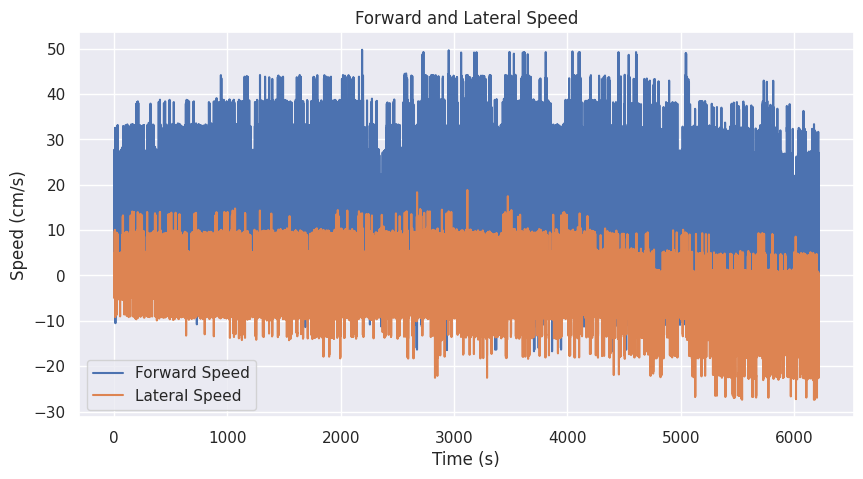

In [4]:
# Plot the forward and lateral speed data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

speed_for = nwb.acquisition["speed_for"].data[:]
speed_lat = nwb.acquisition["speed_lat"].data[:]
timestamps = nwb.acquisition["speed_for"].timestamps[:]

plt.figure(figsize=(10, 5))
plt.plot(timestamps, speed_for, label="Forward Speed")
plt.plot(timestamps, speed_lat, label="Lateral Speed")
plt.xlabel("Time (s)")
plt.ylabel("Speed (cm/s)")
plt.title("Forward and Lateral Speed")
plt.legend()
plt.show()

The above plot shows the forward and lateral speed of the mouse in the virtual environment over time.

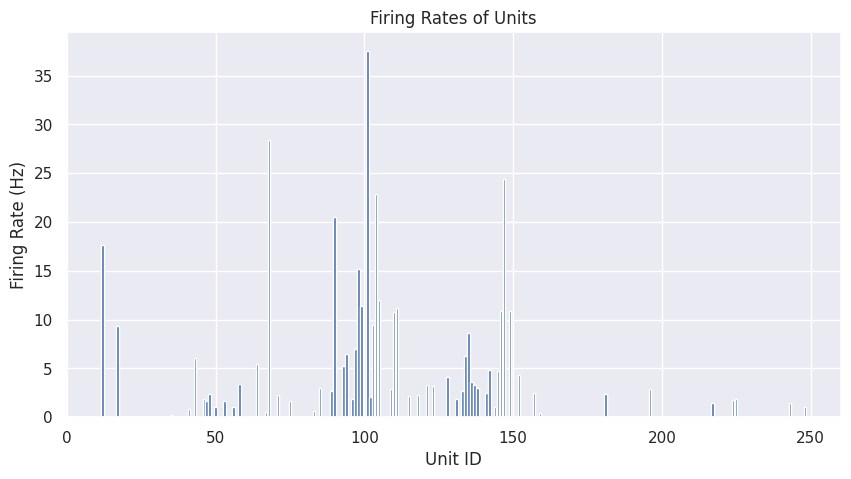

In [5]:
# Plot the firing rates of the units
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

firing_rates = nwb.units["firing_rate"].data[:]
unit_ids = nwb.units["id"].data[:]

plt.figure(figsize=(10, 5))
plt.bar(unit_ids, firing_rates)
plt.xlabel("Unit ID")
plt.ylabel("Firing Rate (Hz)")
plt.title("Firing Rates of Units")
plt.show()

The above plot shows the firing rates of the individual units recorded in the barrel cortex.

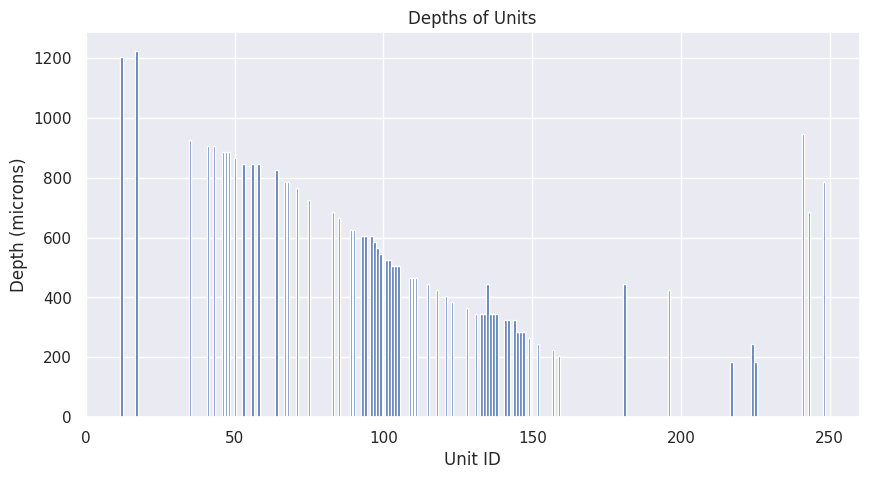

In [6]:
# Plot the depths of the units
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

depths = nwb.units["depth"].data[:]
unit_ids = nwb.units["id"].data[:]

plt.figure(figsize=(10, 5))
plt.bar(unit_ids, depths)
plt.xlabel("Unit ID")
plt.ylabel("Depth (microns)")
plt.title("Depths of Units")
plt.show()

The above plot shows the depths of the individual units recorded in the barrel cortex.

## Examples of Common Analyses

Here are some examples of common analyses that might be relevant to this dataset:

1.  **Trial-based analysis:** Analyze the neuronal activity and behavior during individual trials of the VR task.
2.  **Correlation analysis:** Correlate the neuronal activity with the mouse's movement in the virtual environment.
3.  **Spike sorting analysis:** Analyze the characteristics of the individual units recorded in the barrel cortex.

This notebook provides a basic introduction to the Dandiset and its contents. Further analysis can be performed using the tools and techniques demonstrated in this notebook.